<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/N%E1%BB%93i_c%C6%A1m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7b2c8b0b8a4f2516b71c37645ce43ab7336aa3f94fc6c73036170d4d5828de4e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


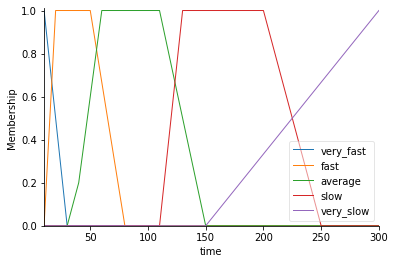

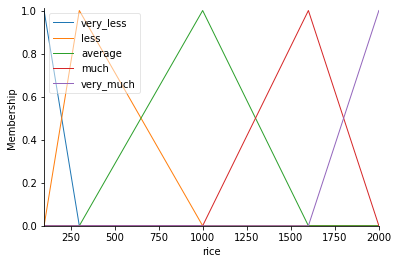

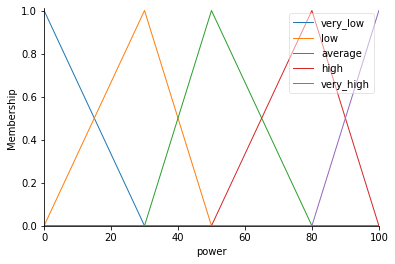

In [6]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

time = ctrl.Antecedent(np.arange(10,310,10),'time')
rice = ctrl.Antecedent(np.arange(100,2100,100),'rice')
power = ctrl.Consequent(np.arange(0,110,10),'power')

time['very_fast']= fuzz.trimf(time.universe,[10,10,30])
time['fast']= fuzz.trapmf(time.universe,[10,20,50,80])
time['average']= fuzz.trapmf(time.universe,[35,60,110,150])
time['slow']= fuzz.trapmf(time.universe,[110,130,200,250])
time['very_slow']= fuzz.trimf(time.universe,[150,300,300])

rice['very_less']= fuzz.trimf(rice.universe,[100,100,300])
rice['less']= fuzz.trimf(rice.universe,[100,300,1000])
rice['average']= fuzz.trimf(rice.universe,[300,1000,1600])
rice['much']= fuzz.trimf(rice.universe,[1000,1600,2000])
rice['very_much']= fuzz.trimf(rice.universe,[1600,2000,2000])

power['very_low']= fuzz.trimf(power.universe,[0,0,30])
power['low']= fuzz.trimf(power.universe,[0,30,50])
power['average']= fuzz.trimf(power.universe,[30,50,80])
power['high']= fuzz.trimf(power.universe,[50,80,100])
power['very_high']= fuzz.trimf(power.universe,[80,100,100])

time.view()
rice.view()
power.view()


26.666666666666664


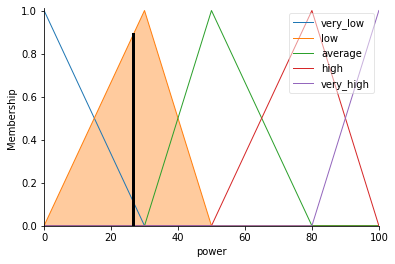

In [12]:
rule1 = ctrl.Rule(time['very_fast'] & rice['very_much'],power['very_high'])
rule2 = ctrl.Rule(time['fast'] & rice['very_much'],power['very_high'])
rule3 = ctrl.Rule(time['average'] & rice['very_much'],power['high'])
rule4 = ctrl.Rule(time['slow'] & rice['very_much'],power['average'])
rule5 = ctrl.Rule(time['very_slow'] & rice['very_much'],power['average'])

rule6 = ctrl.Rule(time['very_fast'] & rice['much'],power['very_high'])
rule7 = ctrl.Rule(time['fast'] & rice['much'],power['high'])
rule8 = ctrl.Rule(time['average'] & rice['much'],power['average'])
rule9 = ctrl.Rule(time['slow'] & rice['much'],power['average'])
rule10 = ctrl.Rule(time['very_slow']& rice['much'],power['average'])

rule11 = ctrl.Rule(time['very_fast'] & rice['average'],power['high'])
rule12 = ctrl.Rule(time['fast'] & rice['average'],power['average'])
rule13 = ctrl.Rule(time['average'] & rice['average'],power['average'])
rule14 = ctrl.Rule(time['slow'] & rice['average'],power['average'])
rule15 = ctrl.Rule(time['very_slow'] & rice['average'],power['low'])

rule16 = ctrl.Rule(time['very_fast'] & rice['less'],power['average'])
rule17 = ctrl.Rule(time['fast'] & rice['less'],power['average'])
rule18 = ctrl.Rule(time['average'] & rice['less'],power['average'])
rule19 = ctrl.Rule(time['slow'] & rice['less'],power['low'])
rule20 = ctrl.Rule(time['very_slow']& rice['less'],power['very_low'])

rule21 = ctrl.Rule(time['very_fast'] & rice['very_less'],power['low'])
rule22 = ctrl.Rule(time['fast'] & rice['very_less'],power['low'])
rule23 = ctrl.Rule(time['average'] & rice['very_less'],power['low'])
rule24 = ctrl.Rule(time['slow'] & rice['very_less'],power['very_low'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_less'],power['very_low'])

powerring_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerring= ctrl.ControlSystemSimulation(powerring_ctrl)
powerring.input['time']=100
powerring.input['rice']=5
powerring.compute()
print(powerring.output['power'])
power.view(sim=powerring)